# Wine Quality Prediction EDA

In [18]:
# import libraries
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# import data loaders
sys.path.append('..')
from src.data.data_loader import DataLoader
import config

## Dataset Overview

In [2]:
# initialize data loader
data_loader = DataLoader()

# load red and white wine data
red_df = data_loader.load_wine_data('red')
white_df = data_loader.load_wine_data('white')

# add quality class column
red_df = data_loader.add_quality_class(red_df)
white_df = data_loader.add_quality_class(white_df)

In [3]:
# view red wine df head
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [4]:
# view white wine df head
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [5]:
# number of obeservations in each type of wine
print(f'Number of red wine samples: {red_df.shape[0]}')
print(f'Number of white wine samples: {white_df.shape[0]}')

Number of red wine samples: 1599
Number of white wine samples: 4898


In [15]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Target Variable Analysis

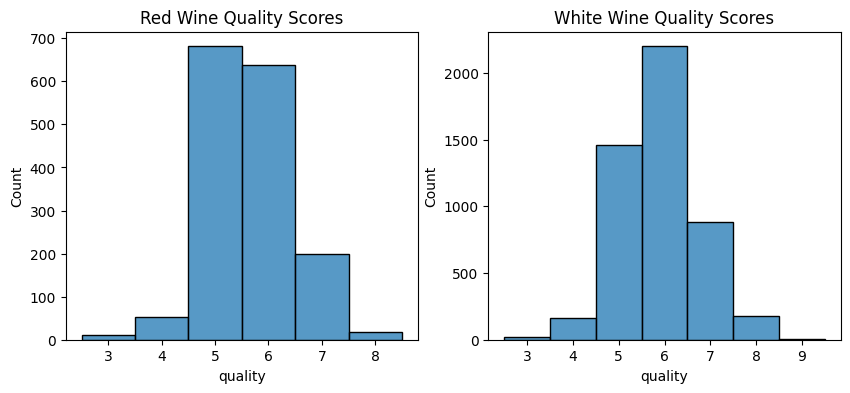

In [22]:
# quality scores for red and white datasets
figure, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=red_df, x='quality', discrete=True, ax=axes[0])
axes[0].set_title('Red Wine Quality Scores')

sns.histplot(data=white_df, x='quality', discrete=True, ax=axes[1])
axes[1].set_title('White Wine Quality Scores')

plt.show()

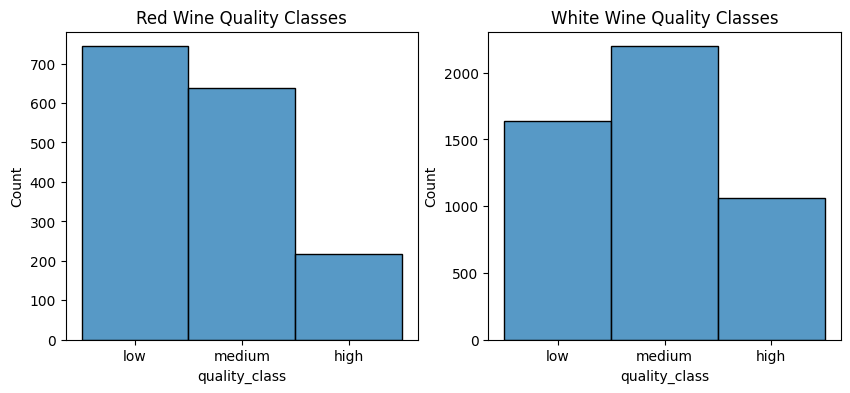

In [23]:
# quality classes for red and white datasets
figure, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=red_df, x='quality_class', discrete=True, ax=axes[0])
axes[0].set_title('Red Wine Quality Classes')

sns.histplot(data=white_df, x='quality_class', discrete=True, ax=axes[1])
axes[1].set_title('White Wine Quality Classes')

plt.show()

## Feature Distribution

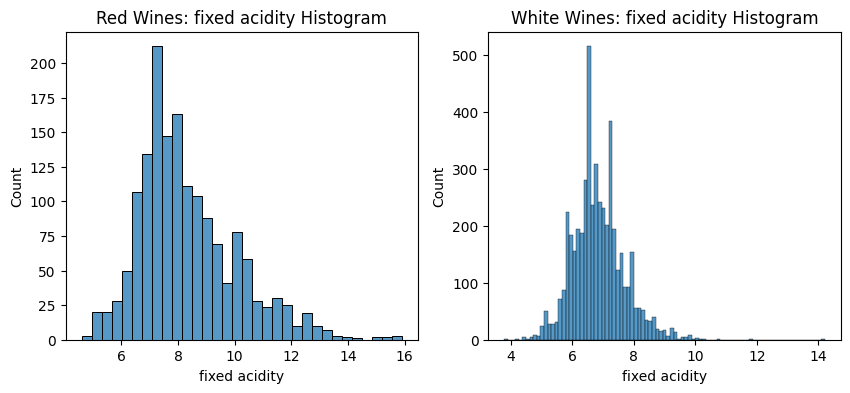

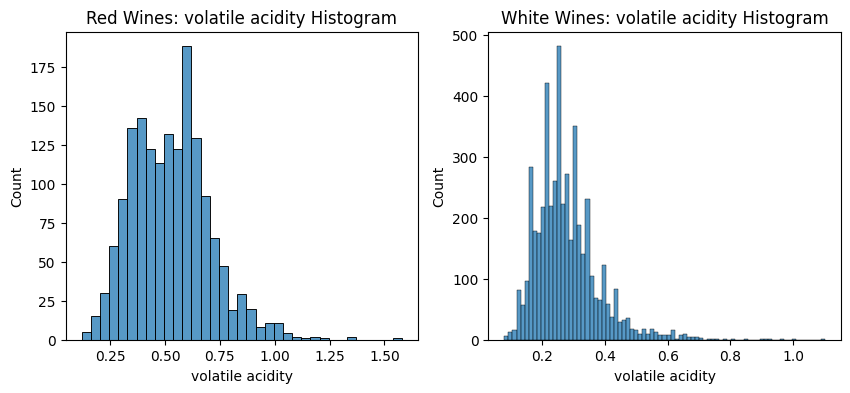

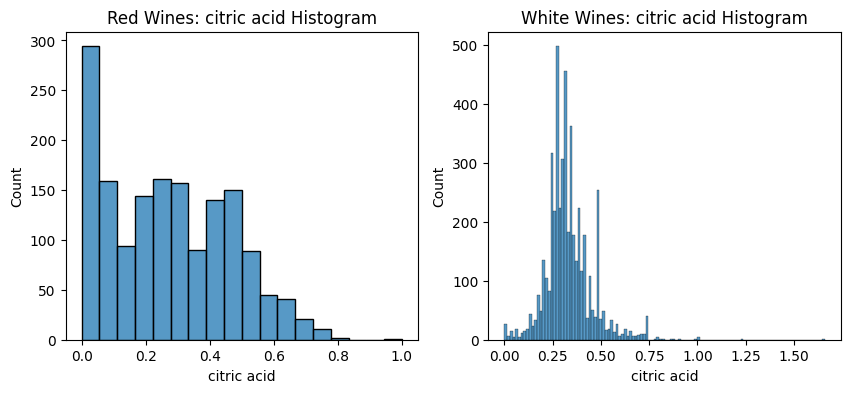

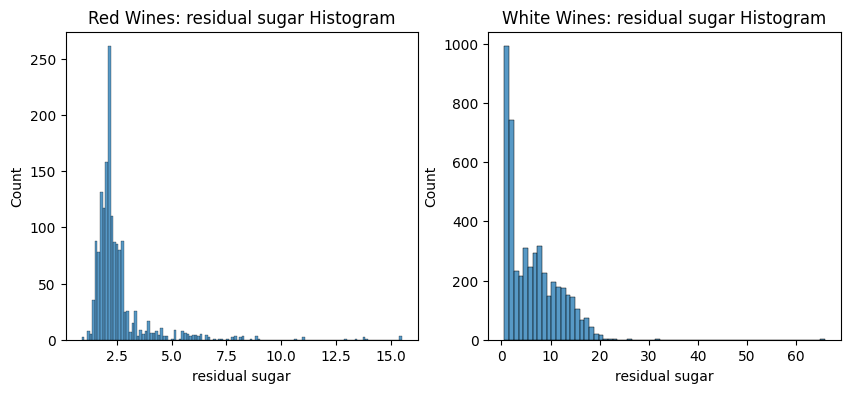

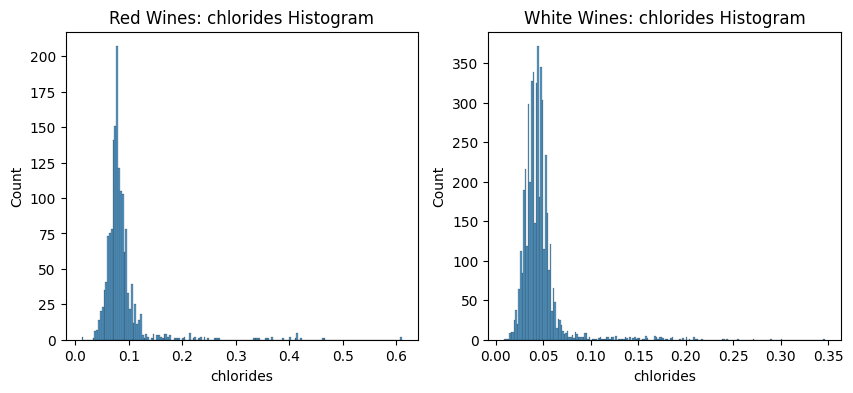

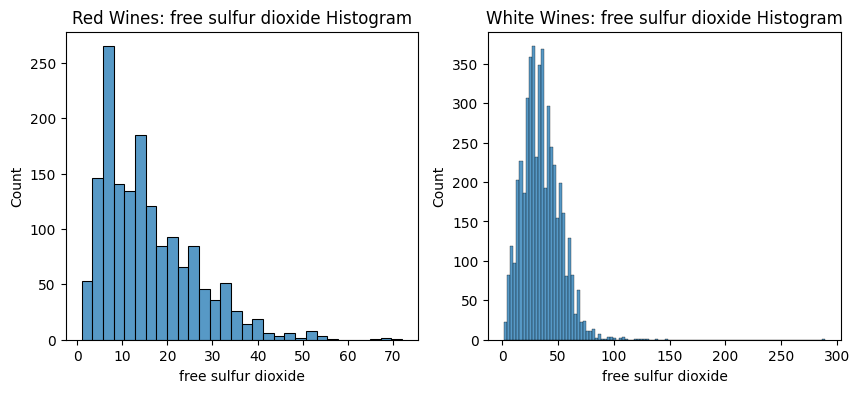

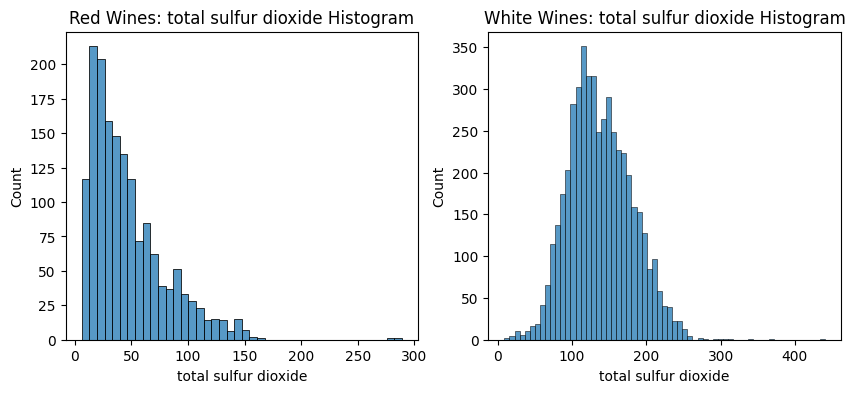

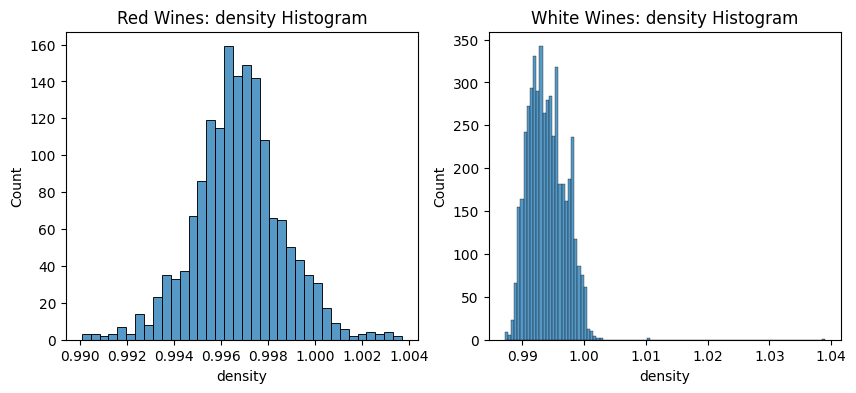

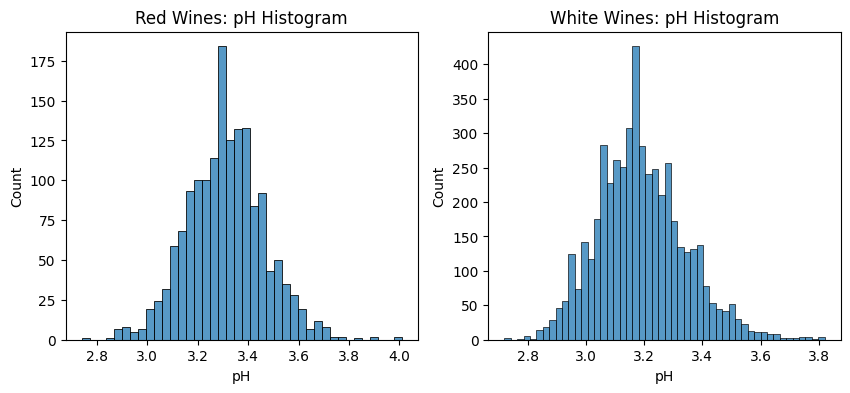

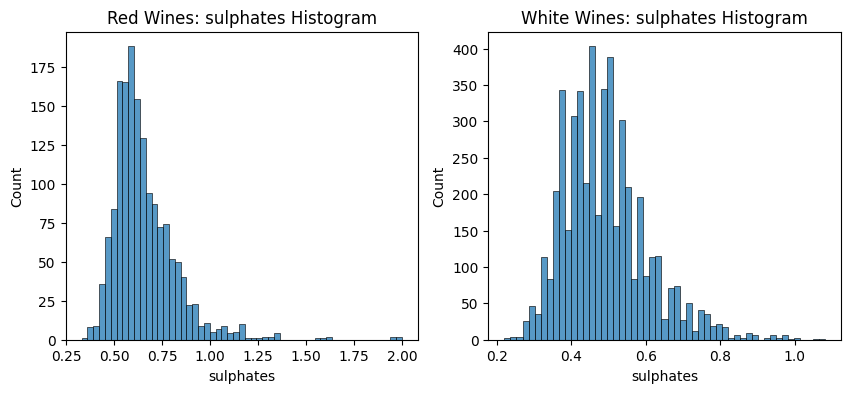

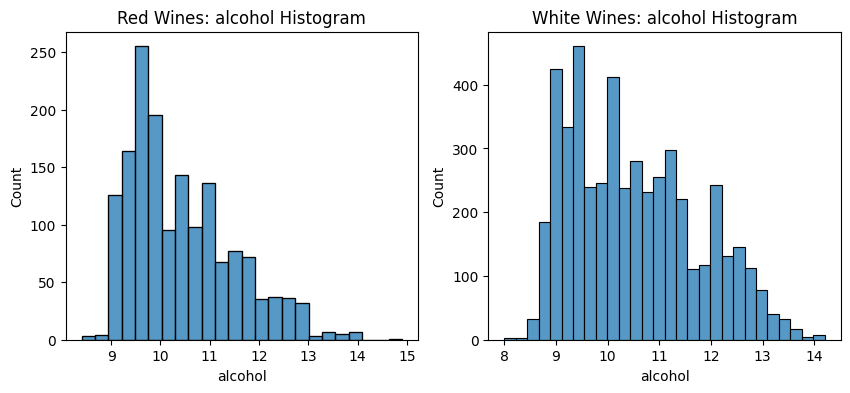

In [20]:
# red wine feature distribution
for feature in config.FEATURE_COLUMNS:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(data=red_df, x=feature, ax=axes[0])
    axes[0].set_title(f'Red Wines: {feature} Histogram')
    sns.histplot(data=white_df, x=feature, ax=axes[1])
    axes[1].set_title(f'White Wines: {feature} Histogram')
    plt.show()

## Correlation Matrix

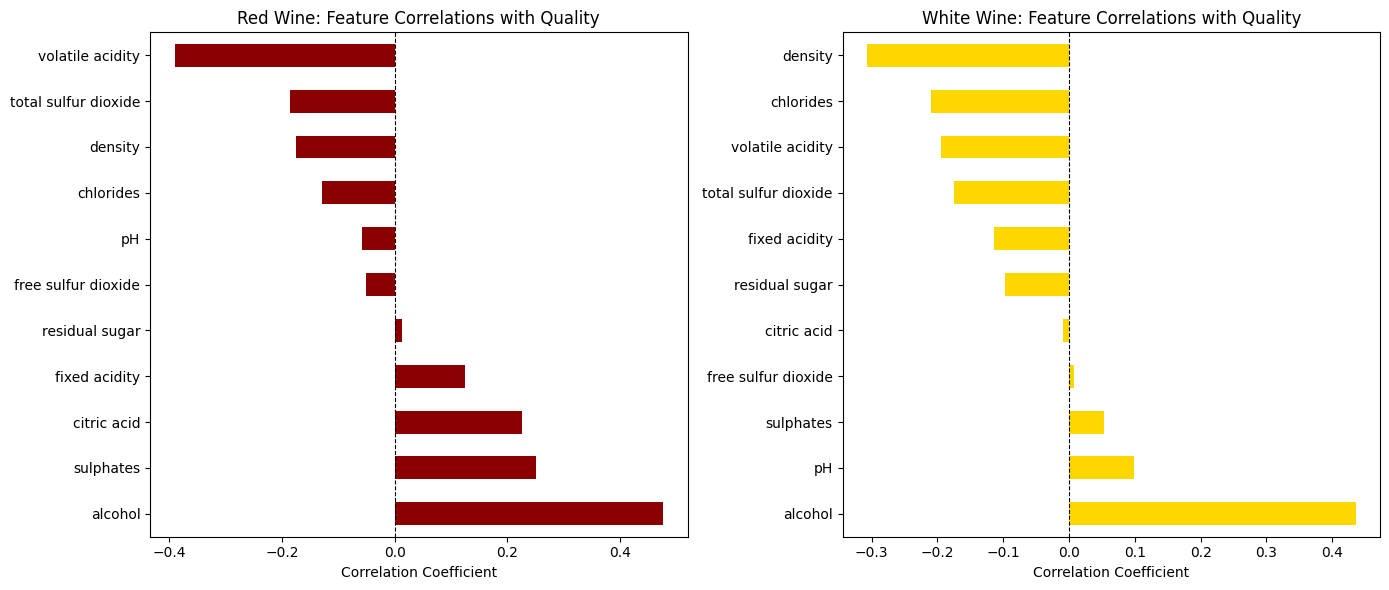

In [26]:
# red and white wine correlations
red_quality_corr = red_df[config.FEATURE_COLUMNS + ['quality']].corr()['quality'].drop('quality').sort_values(ascending=False)
white_quality_corr = white_df[config.FEATURE_COLUMNS + ['quality']].corr()['quality'].drop('quality').sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

red_quality_corr.plot(kind='barh', ax=axes[0], color='darkred')
axes[0].set_title('Red Wine: Feature Correlations with Quality')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)

white_quality_corr.plot(kind='barh', ax=axes[1], color='gold')
axes[1].set_title('White Wine: Feature Correlations with Quality')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()